Epoch 1/20
1563/1563 [==============================] - 92s 57ms/step - loss: 1.7288 - accuracy: 0.3673 - val_loss: 1.4089 - val_accuracy: 0.4855
Epoch 2/20
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4534 - accuracy: 0.4812 - val_loss: 1.2727 - val_accuracy: 0.5426
Epoch 3/20
1563/1563 [==============================] - 90s 58ms/step - loss: 1.3465 - accuracy: 0.5241 - val_loss: 1.1902 - val_accuracy: 0.5780
Epoch 4/20
1563/1563 [==============================] - 89s 57ms/step - loss: 1.2860 - accuracy: 0.5513 - val_loss: 1.1415 - val_accuracy: 0.5963
Epoch 5/20
1563/1563 [==============================] - 89s 57ms/step - loss: 1.2347 - accuracy: 0.5692 - val_loss: 1.1124 - val_accuracy: 0.6093
Epoch 6/20
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1952 - accuracy: 0.5809 - val_loss: 1.0777 - val_accuracy: 0.6188
Epoch 7/20
1563/1563 [==============================] - 88s 56ms/step - loss: 1.1684 - accuracy: 0.5905 - val_loss: 1.1062 -

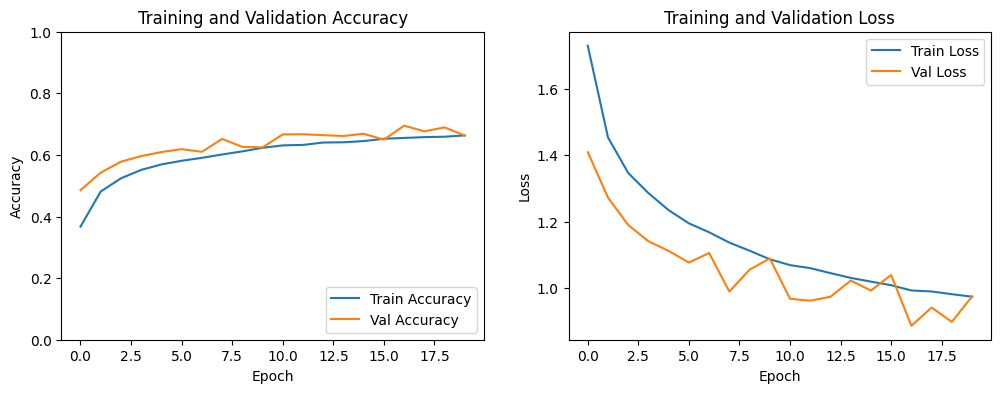

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

# Build the CNN model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


313/313 [==============================] - 6s 18ms/step


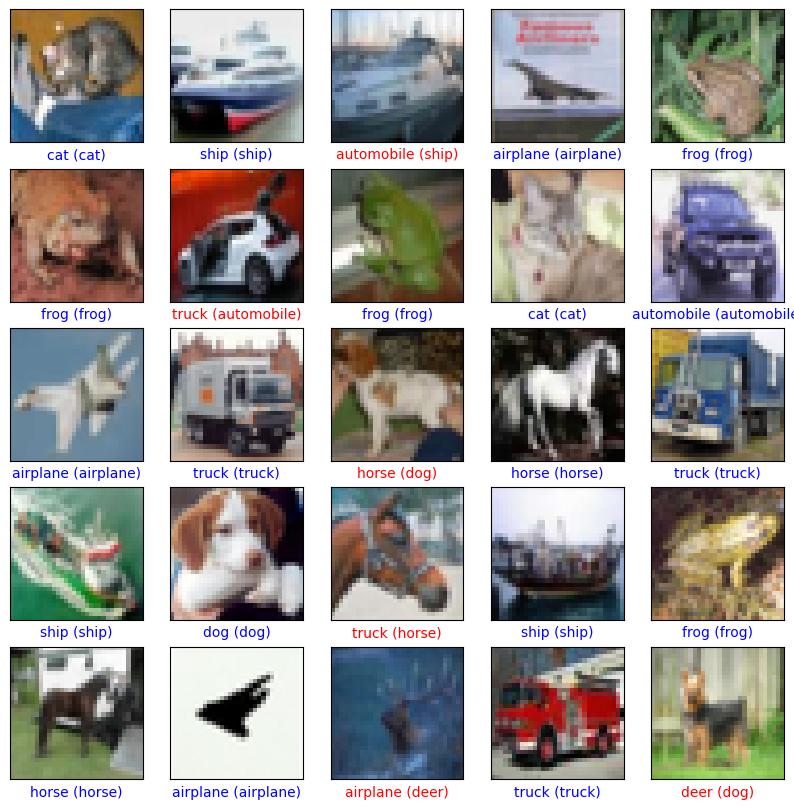

In [3]:
import numpy as np

# Function to plot images along with their predicted labels
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(class_names[labels[i][0]])
        else:
            color = 'blue' if predictions[i] == labels[i] else 'red'
            plt.xlabel(f"{class_names[predictions[i]]} ({class_names[labels[i][0]]})", color=color)
    plt.show()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with their predicted labels
plot_images(x_test, y_test, predicted_labels)
